<a href="https://colab.research.google.com/github/efemeryczny/network_analysis/blob/main/stock_SP500_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Get the list of S&P 500 companies from a CSV file
sp500_df = pd.read_csv('https://datahub.io/core/s-and-p-500-companies/r/constituents.csv')
symbols_sp500 = sp500_df['Symbol'].tolist()

# Download historical data for each symbol in the S&P 500
data_sp500 = yf.download(symbols_sp500, start='2000-01-01', end=pd.Timestamp.now().strftime('%Y-%m-%d'))


[*********************100%***********************]  505 of 505 completed

21 Failed downloads:
- BLL: No timezone found, symbol may be delisted
- DRE: No timezone found, symbol may be delisted
- NLSN: No timezone found, symbol may be delisted
- TWTR: No timezone found, symbol may be delisted
- DISCK: No timezone found, symbol may be delisted
- VIAC: No timezone found, symbol may be delisted
- WLTW: No timezone found, symbol may be delisted
- FBHS: No timezone found, symbol may be delisted
- KSU: No timezone found, symbol may be delisted
- CERN: No timezone found, symbol may be delisted
- PBCT: No timezone found, symbol may be delisted
- CTXS: No timezone found, symbol may be delisted
- XLNX: No timezone found, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- ANTM: No timezone found, symbol may be delisted
- SIVB: No timezone found, symbol may be delisted
- NLOK: No timezone found, symbol may be delisted
- INFO: No timezone found, symbol may be delisted
- BF.B

In [5]:
data_sp500.head()

Adj Close                                           \
                             A AAL AAP      AAPL ABBV       ABC    ABMD   
Date                                                                      
2000-01-03 00:00:00  43.929703 NaN NaN  0.849469  NaN  2.980345  18.250   
2000-01-04 00:00:00  40.573963 NaN NaN  0.777850  NaN  2.776868  17.813   
2000-01-05 00:00:00  38.057144 NaN NaN  0.789232  NaN  2.992315  18.000   
2000-01-06 00:00:00  36.608082 NaN NaN  0.720933  NaN  3.219730  18.032   
2000-01-07 00:00:00  39.658749 NaN NaN  0.755083  NaN  3.638653  17.938   

                                              ...   Volume                 \
                          ABT ACN       ADBE  ...      XEL XLNX       XOM   
Date                                          ...                           
2000-01-03 00:00:00  9.175169 NaN  16.274672  ...  2738600  NaN  13458200   
2000-01-04 00:00:00  8.913024 NaN  14.909402  ...   425200  NaN  14510800   
2000-01-05 00:00:00  8.896640 NaN  15.204175  ...   500200  NaN  17485000   
2000-01-06 00:00:00  9.207941 NaN  15.328289  ...   344100  NaN  19461600   
2000-01-07 00:00:00  9.306242 NaN  16.072983  ...   469500  NaN  16603800   

                                                                     
                        XRAY XYL      YUM ZBH     ZBRA     ZION ZTS  
Date                                                                 
2000-01-03 00:00:00   582300 NaN  3033493 NaN  1055700  1199600 NaN  
2000-01-04 00:00:00   317700 NaN  3315031 NaN   522450   816100 NaN  
2000-01-05 00:00:00  1188000 NaN  4642602 NaN   612225  1124700 NaN  
2000-01-06 00:00:00   534300 NaN  3947658 NaN   263925  1112100 NaN  
2000-01-07 00:00:00  1401000 NaN  6063647 NaN   333900   782000 NaN  

[5 rows x 3030 columns]

In [6]:
# Extract the closing prices for all stocks
close_prices = data_sp500['Close']

# Calculate the correlation matrix
correlation_matrix = close_prices.corr()

# Display the correlation matrix
print(correlation_matrix)

             A       AAL       AAP      AAPL      ABBV       ABC      ABMD  \
A     1.000000 -0.013293  0.801575  0.956325  0.893590  0.845542  0.871519   
AAL  -0.013293  1.000000  0.274234 -0.112289 -0.431661  0.212093  0.162292   
AAP   0.801575  0.274234  1.000000  0.770930  0.488410  0.911157  0.788663   
AAPL  0.956325 -0.112289  0.770930  1.000000  0.902474  0.875757  0.841929   
ABBV  0.893590 -0.431661  0.488410  0.902474  1.000000  0.886382  0.793591   
...        ...       ...       ...       ...       ...       ...       ...   
YUM   0.893252  0.064025  0.891466  0.903327  0.872565  0.936520  0.884158   
ZBH   0.807099  0.391067  0.856346  0.745907  0.564721  0.841150  0.790118   
ZBRA  0.933018 -0.048502  0.758038  0.935229  0.747678  0.774831  0.834833   
ZION  0.112152  0.484986 -0.109907  0.050339  0.714134 -0.110241  0.133453   
ZTS   0.958932 -0.633552  0.606491  0.952605  0.846030  0.733473  0.783265   

           ABT       ACN      ADBE  ...       XEL  XLNX       X

In [8]:
correlation_matrix.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,483.000000,484.000000,484.000000,484.000000,...,484.000000,0.0,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,0.709014,0.146941,0.684926,0.690831,0.587573,0.704135,0.675806,0.723672,0.743128,0.691490,...,0.714958,NaN,0.252850,0.508198,0.667065,0.739862,0.695802,0.680582,0.142617,0.611917
std,0.339749,0.289360,0.294406,0.358092,0.427506,0.328500,0.322646,0.353414,0.351587,0.352806,...,0.349460,NaN,0.293379,0.297575,0.425915,0.343092,0.278313,0.335280,0.299079,0.488499
min,-0.797438,-0.836048,-0.673674,-0.796934,-0.806580,-0.725085,-0.835244,-0.835503,-0.829986,-0.825242,...,-0.838835,NaN,-0.659095,-0.732026,-0.882990,-0.786314,-0.670610,-0.763946,-0.624961,-0.853945
25%,0.641787,0.000976,0.640573,0.593915,0.506543,0.673524,0.615744,0.644973,0.683477,0.591508,...,0.661481,NaN,0.104110,0.419892,0.620707,0.692944,0.672209,0.591753,-0.038223,0.499525
50%,0.858118,0.130855,0.798667,0.847962,0.790370,0.842598,0.811708,0.884357,0.901992,0.856113,...,0.877672,NaN,0.295117,0.587561,0.864751,0.887672,0.806442,0.817614,0.068561,0.845198
75%,0.930998,0.309393,0.859917,0.930339,0.865751,0.901574,0.876567,0.946320,0.959141,0.922163,...,0.930568,NaN,0.430000,0.700121,0.924707,0.943224,0.856625,0.903507,0.263820,0.938286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 3000x3000 with 0 Axes>

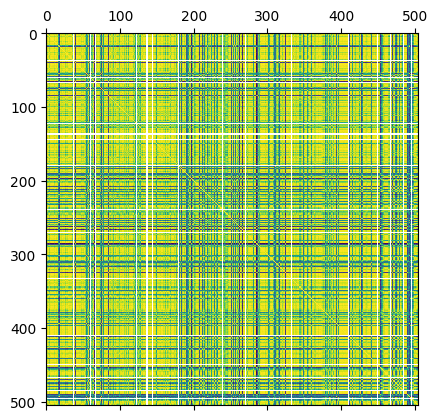

In [11]:
plt.figure(figsize=(30, 30))
plt.matshow(correlation_matrix.corr(numeric_only=True))

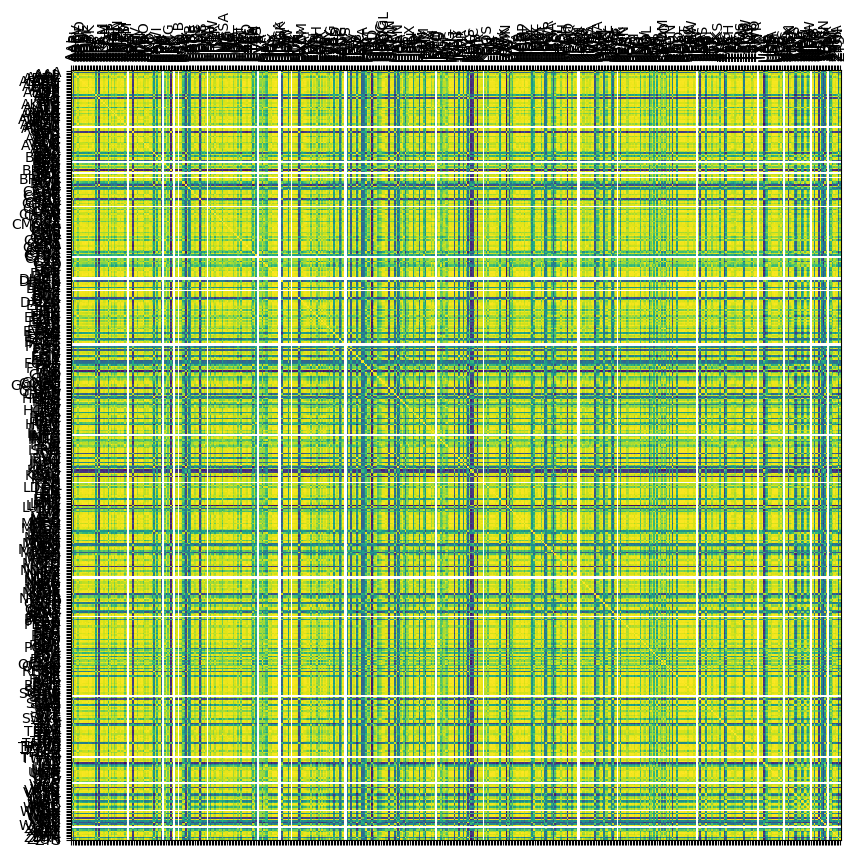

In [13]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr(numeric_only=True)
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(correlation_matrix, 10)

In [18]:
# Preprocess the correlation matrix to handle negative values
correlation_matrix = correlation_matrix.abs().remove
correlation_matrix

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.013293,0.801575,0.956325,0.893590,0.845542,0.871519,0.949440,0.981959,0.940688,...,0.914055,NaN,0.213330,0.474654,0.958636,0.893252,0.807099,0.933018,0.112152,0.958932
AAL,0.013293,1.000000,0.274234,0.112289,0.431661,0.212093,0.162292,0.019347,0.006125,0.033003,...,0.080745,NaN,0.140023,0.469825,0.179453,0.064025,0.391067,0.048502,0.484986,0.633552
AAP,0.801575,0.274234,1.000000,0.770930,0.488410,0.911157,0.788663,0.830860,0.859880,0.776120,...,0.863413,NaN,0.386258,0.783568,0.655184,0.891466,0.856346,0.758038,0.109907,0.606491
AAPL,0.956325,0.112289,0.770930,1.000000,0.902474,0.875757,0.841929,0.964103,0.970452,0.937731,...,0.908033,NaN,0.249284,0.479694,0.883992,0.903327,0.745907,0.935229,0.050339,0.952605
ABBV,0.893590,0.431661,0.488410,0.902474,1.000000,0.886382,0.793591,0.842798,0.883961,0.761895,...,0.827487,NaN,0.048195,0.256465,0.834618,0.872565,0.564721,0.747678,0.714134,0.846030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.893252,0.064025,0.891466,0.903327,0.872565,0.936520,0.884158,0.944849,0.962856,0.892727,...,0.946167,NaN,0.450371,0.717064,0.957828,1.000000,0.865882,0.857349,0.086362,0.943626
ZBH,0.807099,0.391067,0.856346,0.745907,0.564721,0.841150,0.790118,0.829418,0.831486,0.803171,...,0.858497,NaN,0.311847,0.794470,0.802085,0.865882,1.000000,0.765333,0.125111,0.717518
ZBRA,0.933018,0.048502,0.758038,0.935229,0.747678,0.774831,0.834833,0.953733,0.942921,0.972480,...,0.862389,NaN,0.086374,0.500910,0.917382,0.857349,0.765333,1.000000,0.167544,0.947274
ZION,0.112152,0.484986,0.109907,0.050339,0.714134,0.110241,0.133453,0.057603,0.060870,0.123700,...,0.005830,NaN,0.310233,0.217055,0.814540,0.086362,0.125111,0.167544,1.000000,0.694695


Graph with 0 nodes and 0 edges


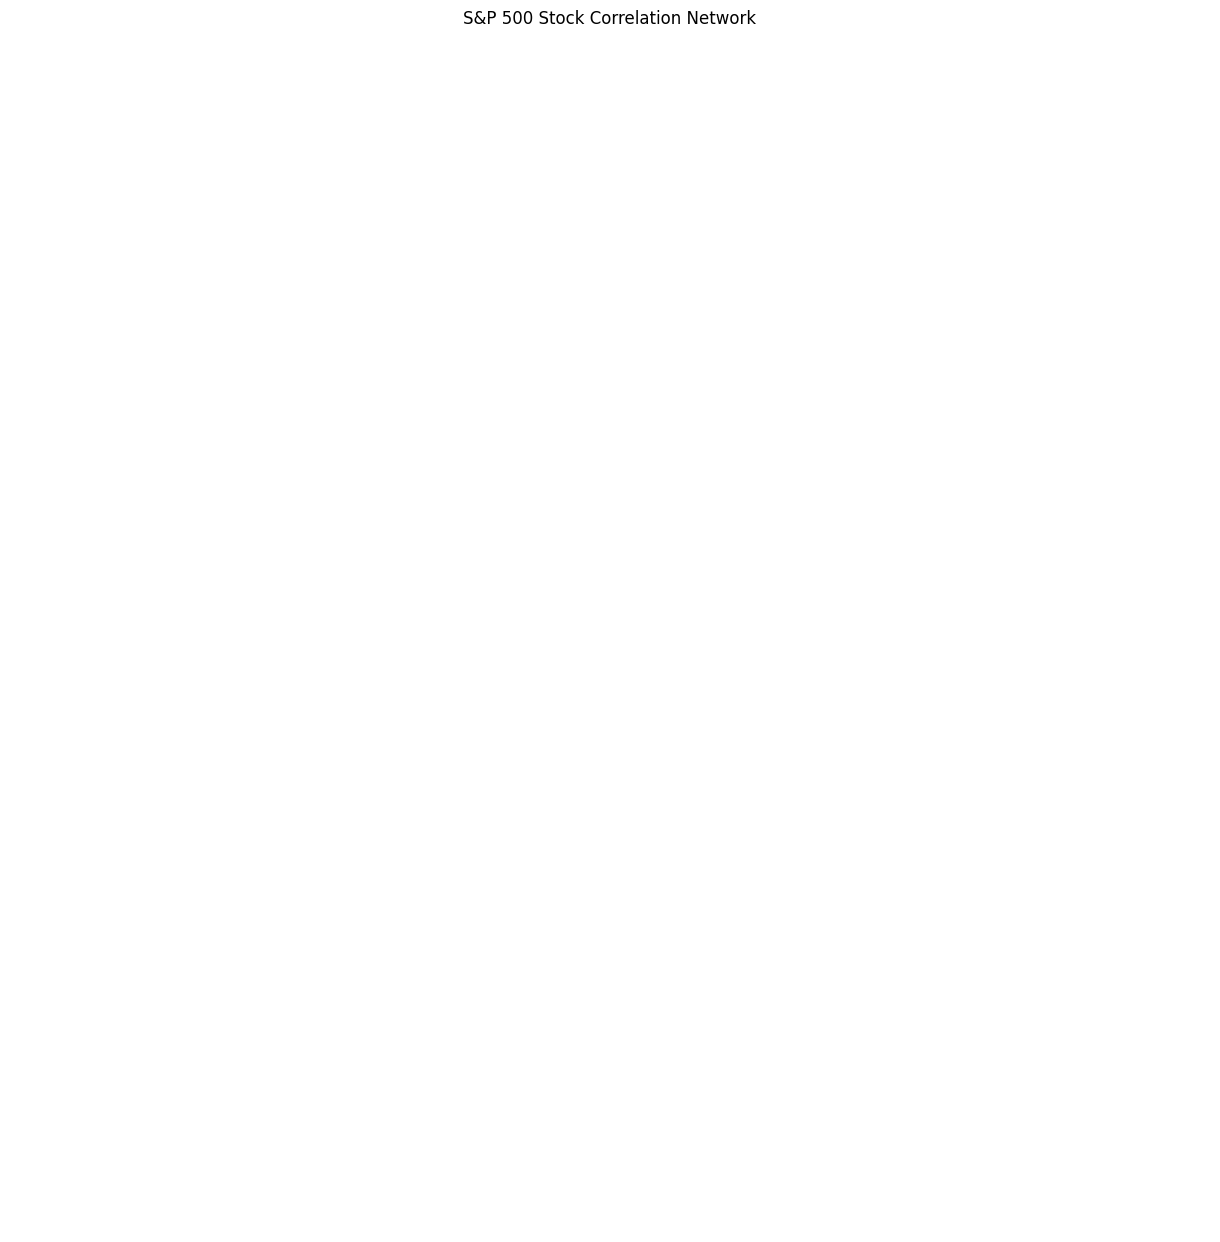

In [22]:
# Preprocess the correlation matrix to handle negative values
correlation_matrix = correlation_matrix.abs().dropna()

# Create a weighted correlation network
network = nx.from_pandas_adjacency(correlation_matrix)

# Set the node labels to stock symbols
mapping = {i: symbol for i, symbol in enumerate(symbols_sp500)}
network = nx.relabel_nodes(network, mapping)
print(network)
# Draw the network
plt.figure(figsize=(12, 12))
nx.draw_kamada_kawai(network, node_size=200, font_size=8, alpha=0.8)
plt.title("S&P 500 Stock Correlation Network")
plt.axis("off")
plt.show()

In [23]:
G = nx.from_numpy_matrix(correlation_matrix)

AttributeError: ignored